<a href="https://colab.research.google.com/github/ShivenTripathi/GRiD-R2-2020/blob/master/someEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
% cd /content/drive/My Drive/dataset/nordstrom/attributes

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/dataset/nordstrom/attributes


In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#LOAD ATTR CATEGORIES
f = open("list_attr_cloth.txt", "r")
att_type=[]
i=0
for x in f:
  if i>1:
    x=x.split()
    att_type.append(int(x[len(x)-1]))
  i=i+1 
f.close()

In [ ]:
def dfGen(day):
  filename=str(day)+"A.txt"
  #LOAD IMG NAMES
  f = open(filename, "r")
  file_names=[]
  i=2
  for x in f:
    if i%3==0:
      file_names.append(x)
    i=i+1  
  f.close()
  
  #LOAD ATTRIBUTES FOR EACH IMAGE
  f = open(filename, "r")
  att_number=[]
  i=1
  for x in f:
    if i%3==0:
      x = x.split(",")
      y=[]
      for j in range(10):
        y.append(int(x[j]))
      att_number.append(y)
    i=i+1  
  f.close()

  #CATEGORISE ATTRIBUTES
  att=[]
  for i in range(len(att_number)):
    a=[]
    for j in range(5):
      f=0
      for k in range(10):
        if att_type[att_number[i][k]]==j+1:
          f=f+1
          if f==1:
            b=att_number[i][k]
          if f==2:
            b=att_number[i][k]
      if f==0:
        b=-1  
      a.append(b)
    att.append(a)

  #FINAL LIST OF  SECOND MOST POPULAR ATTRIBUTES
  att1=[]
  for i in range(5):
    t=[]
    for j in range(len(att)):
      t.append(att[j][i])
    att1.append(t)  

  #CONVERT TO A DATAFRAME
  df = pandas.DataFrame(data={"source": file_names, "att1": att1[0], "att2": att1[1], "att3": att1[2], "att4": att1[3], "att5": att1[4]})
  df.to_csv("./file.csv", sep=',',index=False)

  return df

In [ ]:
def plotAttr(attr,days=7):
  entries=[]
  for i in range(7):
    entries.append([])
  max_plots=0
  for i in range(1,days+1):
    df=dfGen(i)
    a=(df['att'+str(attr)].value_counts()/len(df.index)).to_frame('counts').transpose()
    j=0
    for column in a.columns:
      entries[j].append(a.iloc[0][column])
      j+=1
    max_plots=max(max_plots,j)
  try:
    for i in range(max_plots):
      plt.plot(np.arange(1,8),entries[i])
    plt.show()
  except:
    pass

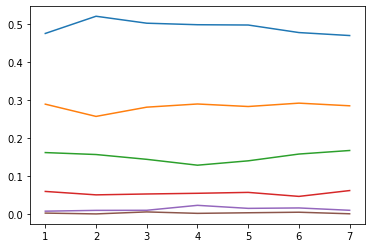

In [ ]:
plotAttr(2)